# Demographic Data Analyzer
This project analyzes a file containing demographic data. The file includes data on the education level, salary (based on a threshold, not absolute), and occupation for individuals from multiple countries (which are also noted in the dataset), as well as other demographic infromation. This project answers various questions about demographic trends in the data. It is an extension of the Demographic Data Analyzer project in freeCodeCamp's Data Analysis with Python course. The completed original project can be found on [gitHub](https://github.com/rhynerj/rhynerj-demographic-data-analyzer). The project description can be found on the [freeCodeCamp website](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/demographic-data-analyzer). The dataset can be found in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income).

Imports

In [2]:
import pandas as pd

Read demographic data from adult.data.csv file

In [3]:
# missing data represented by "?" csv; read function set to replace these with NA
df = pd.read_csv('adult.data.csv', na_values=['?'])

Inspect data

In [4]:
# first 5 rows
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# number of rows and columns
df.shape

(32561, 15)

In [6]:
# column content
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# check which columns contain missing values
df.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [8]:
# generate descriptive statistics for numerical columns
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Analyze Data

Function for calculating percents

In [4]:
# function to get normalized value counts and convert to percent
# takes in the column of a data frame
# returns the percents as a Series
def percents(datacol) :
  return datacol.value_counts(normalize=True) * 100

How many of each race are represented in this dataset?

In [9]:
# get number of occurences of each race included in the dataset
race_count = df['race'].value_counts()
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [58]:
# as percents
percents(df['race'])

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: race, dtype: float64

Race distribution

<AxesSubplot:title={'center':'Race'}>

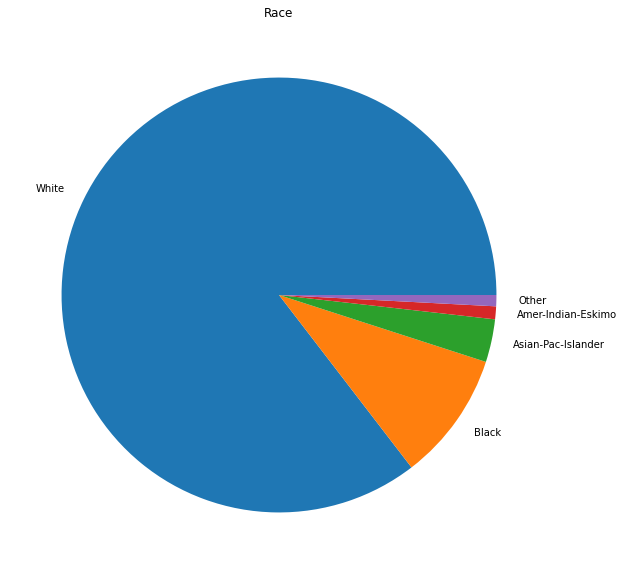

In [36]:
# pie chart of race value counts
race_count.plot(kind='pie', figsize=(10,10), title='Race', ylabel='')

Sex distribution

In [60]:
percents(df['sex'])

Male      66.920549
Female    33.079451
Name: sex, dtype: float64

What is the average age of men?

In [63]:
# filter by value in "sex" column and find the mean of the age column for the results
men = df['sex'] == 'Male'
df.loc[men, 'age'].mean()

39.43354749885268

Average age of women

In [62]:
# filter by value in "sex" column and find the mean of the age column for the results
women = df['sex'] == 'Female'
df.loc[women, 'age'].mean()

36.85823043357163

Age distribution

<AxesSubplot:title={'center':'Age Distribution'}, ylabel='Density'>

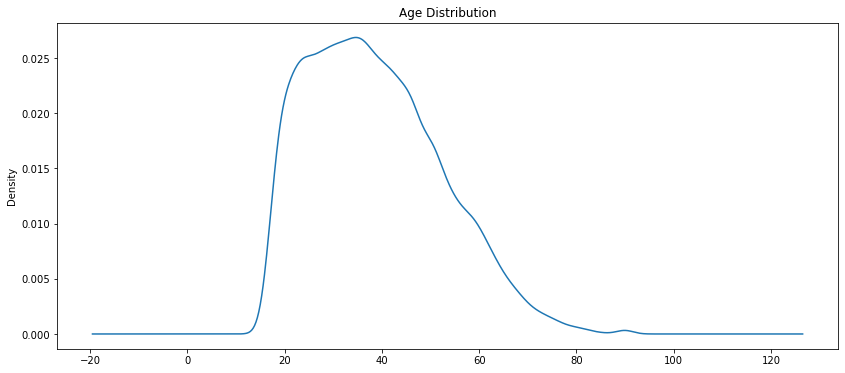

In [67]:
# density plot of age
df['age'].plot(kind='kde', figsize=(14,6), title='Age Distribution', xlabel='Age')

What is the percentage of people who have a Bachelor's degree?

In [13]:
# use percents function to calculate educational distribution, then select the value for Bachelors
bpercents = percents(df['education'])
bpercents['Bachelors']

16.44605509658794

Education level distribution

In [68]:
# all percents
bpercents

HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Assoc-voc        4.244341
11th             3.608612
Assoc-acdm       3.276926
10th             2.865391
7th-8th          1.983969
Prof-school      1.768987
9th              1.578576
12th             1.329812
Doctorate        1.268389
5th-6th          1.022696
1st-4th          0.515955
Preschool        0.156629
Name: education, dtype: float64

<AxesSubplot:title={'center':'Highest Education Level'}>

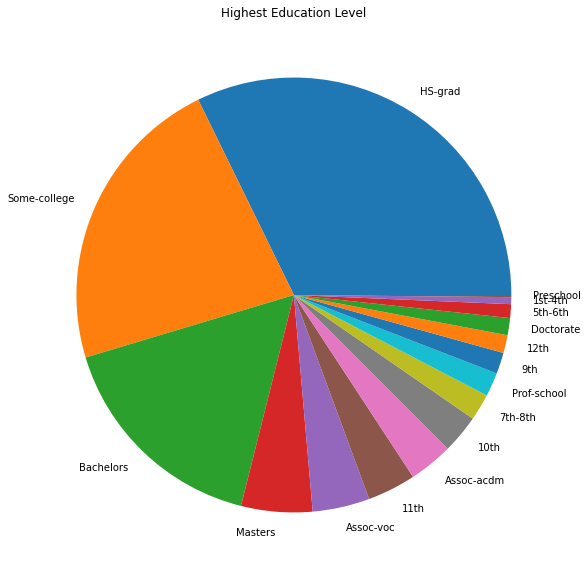

In [39]:
# pie chart of the percentages of each education level
bpercents.plot(kind='pie', figsize=(10,10), title='Highest Education Level', ylabel='')

Salary distribution

In [6]:
# get percentage distribution of salary threshold
salpercents = percents(df['salary'])
salpercents

<=50K    75.919044
>50K     24.080956
Name: salary, dtype: float64

<AxesSubplot:title={'center':'Salary Distribution of Sample'}, xlabel='Salary', ylabel='Percentage'>

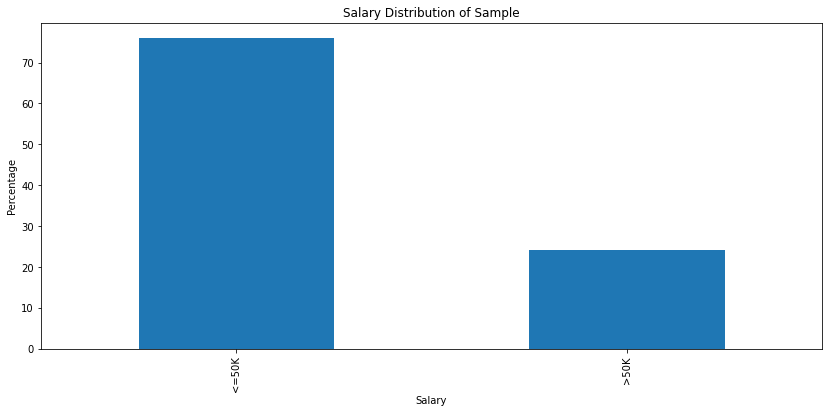

In [7]:
# bar graph of where people fall with regard to the 50K salary threshold
salpercents.plot(kind='bar', figsize=(14,6), title='Salary Distribution of Sample', xlabel='Salary', ylabel='Percentage')

What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?

In [57]:
# people with advanced education
higher_ed_list = ['Bachelors', 'Masters', 'Doctorate']
# data frame including only people with advanced education
in_higher_ed = df['education'].isin(higher_ed_list)
higher_education = df[in_higher_ed]
higher_education.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [18]:
# percentage of people with advanced education whose salary is >50K
shpercents = percents(higher_education['salary'])
shpercents['>50K']

46.535843011613935

Salary groupings of people with advanced education

<AxesSubplot:title={'center':'Salaries of People With Advanced Education'}, xlabel='Salary', ylabel='Percentage'>

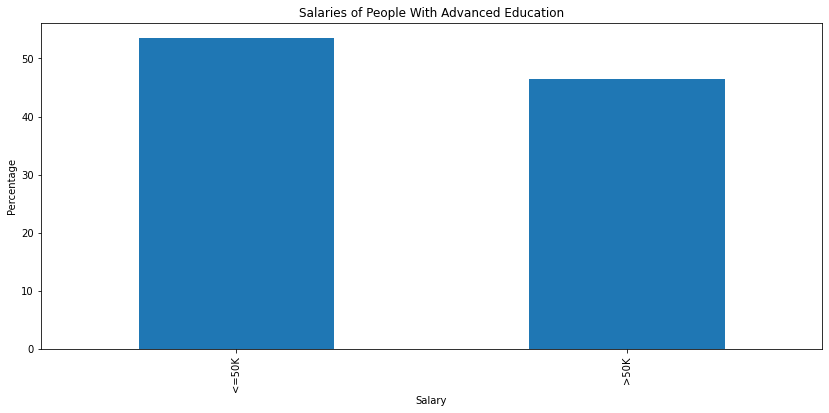

In [49]:
# bar graph of where people with advanced education fall with regard to the 50K salary threshold
shpercents.plot(kind='bar', figsize=(14,6), title='Salaries of People With Advanced Education', xlabel='Salary', ylabel='Percentage')

What percentage of people without advanced education make more than 50K?

In [56]:
# data frame people without advanced education
lower_education = df[~in_higher_ed]
lower_education.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [24]:
# percentage of people without advanced education whose salary is >50K
slpercents = percents(lower_education['salary'])
slpercents['>50K']

17.3713601914639

<AxesSubplot:title={'center':'Salaries of People Without Advanced Education'}, xlabel='Salary', ylabel='Percentage'>

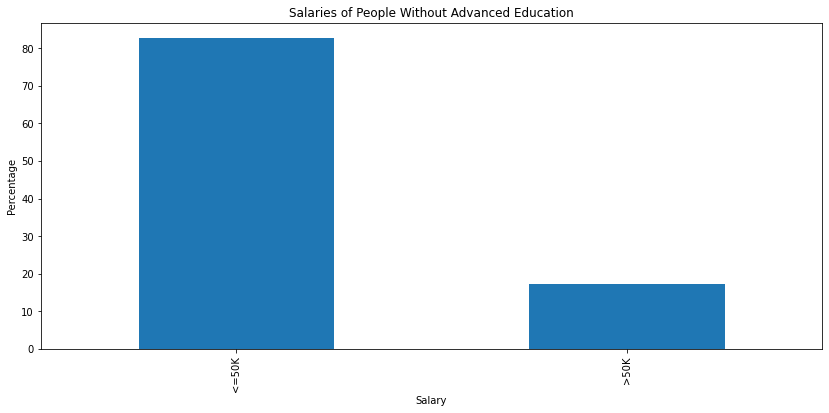

In [50]:
# bar graph of where people without advanced education fall with regard to the 50K salary threshold
slpercents.plot(kind='bar', figsize=(14,6), title='Salaries of People Without Advanced Education', xlabel='Salary', ylabel='Percentage')

What is the minimum number of hours a person works per week?

In [26]:
# smallest value in the hours-per-week column
min_work_hours = df['hours-per-week'].min()
min_work_hours

1

What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [27]:
# data frame of the people who work the minimum hour value
min_workers = df[df['hours-per-week'] == min_work_hours]
# percentage of people who work the minimum number of hours per week whose salary is >50K
mpercents = percents(min_workers['salary'])
mpercents['>50K']

10.0

<AxesSubplot:title={'center':'Salaries of People Who Work the Minimum Hours-per-Week'}, xlabel='Salary', ylabel='Percentage'>

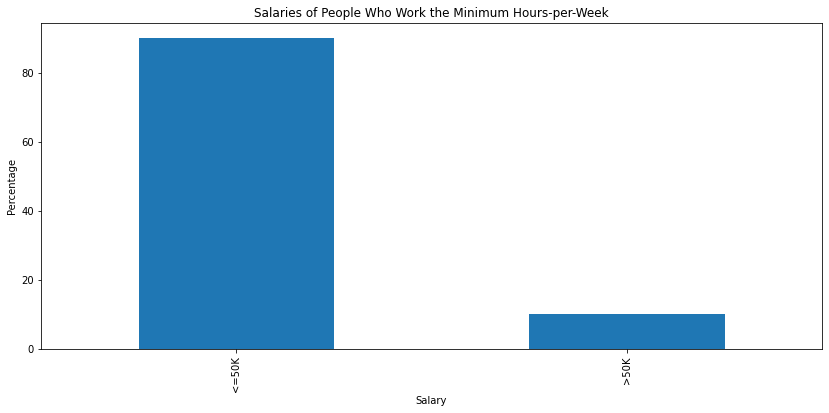

In [41]:
# bar graph of where people who work the minimum number of hours fall with regard to the 50K salary threshold
mpercents.plot(kind='bar', figsize=(14,6), title='Salaries of People Who Work the Minimum Hours-per-Week', xlabel='Salary', ylabel='Percentage')

What country has the highest percentage of people that earn >50K?

In [29]:
# data frame of percentage breakdown of salaries >50K versus <=50K for each country
country_sals = percents(df.groupby(['native-country'])['salary']).reset_index(name='percent')
country_sals.head()

,native-country,salary,percent
0,Cambodia,<=50K,63.157895
1,Cambodia,>50K,36.842105
2,Canada,<=50K,67.768595
3,Canada,>50K,32.231405
4,China,<=50K,73.333333


In [71]:
# series of the percentage values for the >50K salary category for each country
# index is set to native-country
high_country_sals = country_sals[country_sals['salary'] == '>50K'].set_index('native-country')['percent']
high_country_sals.head()

native-country
Cambodia    36.842105
Canada      32.231405
China       26.666667
Columbia     3.389831
Cuba        26.315789
Name: percent, dtype: float64

<AxesSubplot:title={'center':'Percentage of People Earning High Salaries in Each Country'}, xlabel='Native Country', ylabel='Percent of People Earning >50K'>

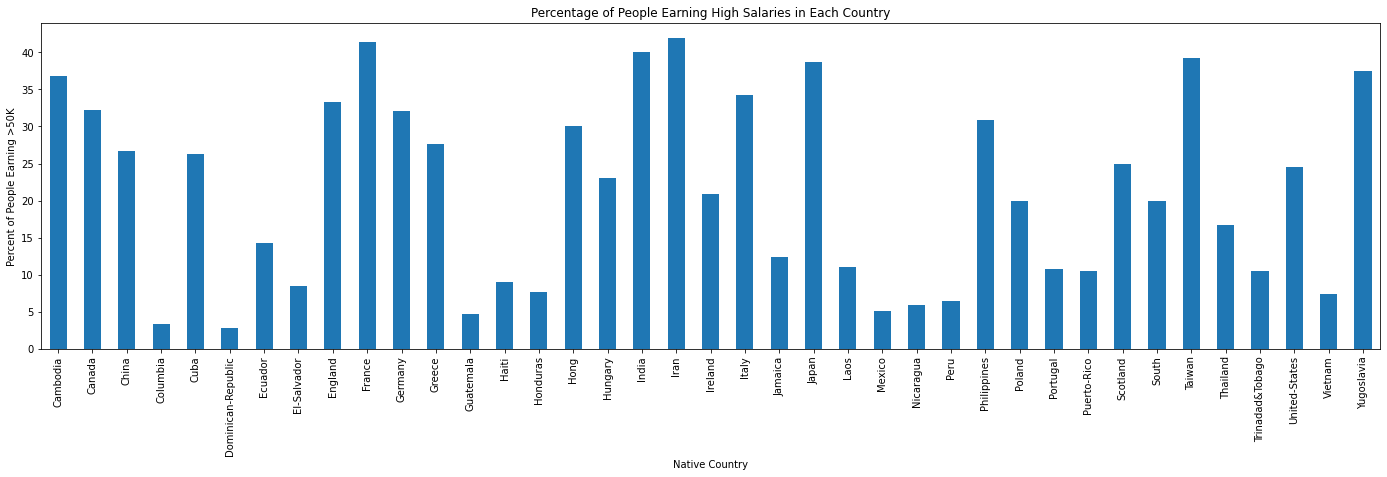

In [43]:
# bar graph of the percent of people in each country who earn >50K
high_country_sals.plot(kind='bar', figsize=(24, 6), title='Percentage of People Earning High Salaries in Each Country', xlabel='Native Country', ylabel='Percent of People Earning >50K')

In [44]:
# highest percentage value for people in a country earning >50K
highest_earning_country_percentage = high_country_sals.max()
highest_earning_country_percentage

41.86046511627907

In [45]:
# highest earning country (country whose high-earning percentage matches previously calculated maximum)
highest_earning_country = high_country_sals[high_country_sals == highest_earning_country_percentage].index[0]
highest_earning_country

'Iran'

Average percentage of high earners

In [72]:
# mean percentage of people who earned >50K across countries
high_country_sals.mean()

21.274757377254662

High earning occupations

In [73]:
# people who earn >50K
high_earners = df[df['salary'] == '>50K']
high_earners.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [75]:
# distribution of occupations for people who earn >50K (in all countries)
opercents = percents(high_earners['occupation'])
opercents

Exec-managerial      25.725490
Prof-specialty       24.300654
Sales                12.849673
Craft-repair         12.143791
Adm-clerical          6.627451
Transport-moving      4.183007
Tech-support          3.699346
Machine-op-inspct     3.267974
Protective-serv       2.758170
Other-service         1.790850
Farming-fishing       1.503268
Handlers-cleaners     1.124183
Armed-Forces          0.013072
Priv-house-serv       0.013072
Name: occupation, dtype: float64

<AxesSubplot:title={'center':'Occupations of People Whose Salary Is >50K'}>

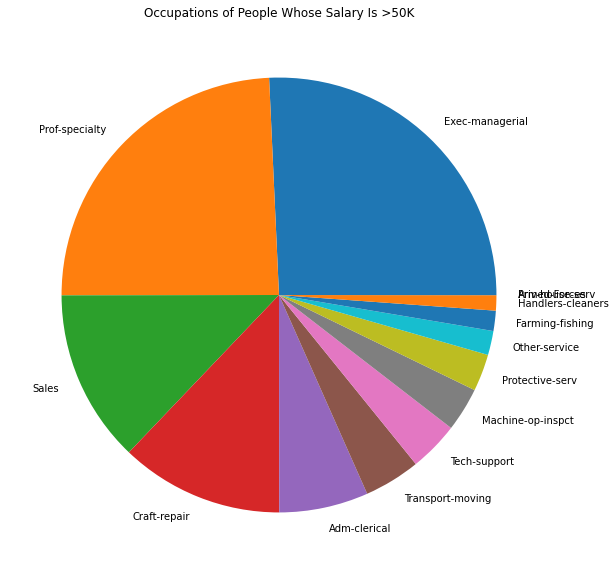

In [76]:
# pie chart of the occupational distribution of people who earn >50K 
opercents.plot(kind='pie', figsize=(10,10), title='Occupations of People Whose Salary Is >50K', ylabel='')

Identify the most popular occupation for those who earn >50K in India.

In [52]:
# people from India
india = df['native-country'] == 'India'
# people who earn >50K
high_earning = df['salary'] == '>50K'
# data frame of people from India who earn >50K
high_earners_india = df.loc[(india & high_earning)]
high_earners_india.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
968,48,Private,164966,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
1327,52,Private,168381,HS-grad,9,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K
7258,42,State-gov,102343,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,>50K
7285,54,State-gov,93449,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [53]:
# confirm that none of the missing occupation values are present in the derived data frame
high_earners_india.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [54]:
# number of people from India who earn >50K in each occupation
IN_occupations = high_earners_india['occupation'].value_counts()
# the most popular occupation
IN_occupations.index[0]

'Prof-specialty'

<AxesSubplot:title={'center':'Occupations of People from India Whose Salary Is >50K'}>

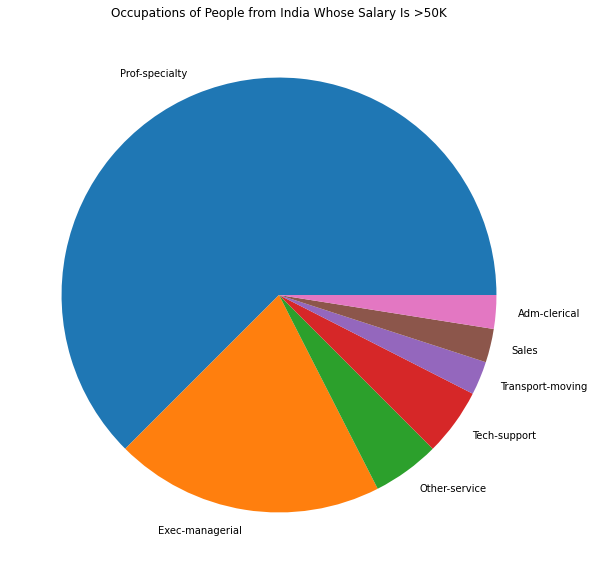

In [55]:
# pie chart of the occupational distribution of people from India who earn >50K 
IN_occupations.plot(kind='pie', figsize=(10,10), title='Occupations of People from India Whose Salary Is >50K', ylabel='')

### Conclusions

Sample demographics

* The demographic data set lacks racial diversity. It is mostly (~85%) white.
* The data set is mostly representative of men. It is about 2/3 (~67%) male. This is measured in the "Sex" column, which only includes "Male" and "Female" as options.
* For men, the average age is about 39, close to the average age for women, which is about 37. Half of the sample falls between the age of 28 and 48. Given that this data set is focused on salary (i.e. the labor force), this is a reasonable age distribution.
* Most of people in the sample have at least a high school diploma. High school graduates make up the largest portion, at about 32%, followed by some college (~22%), and Bachelor's degree (~16%).
* Only about one quarter (~24%) of the sample population earns a salary of >50K.

Effects on salary

* People with advanced education (Bachelor's, Master's, or Doctorate) were more likely to earn >50. About 47% of people with advanced education earned >50, compared to only about 17% of people without advanced education.
* People who worked the mininum hours-per-week (1) were unlikely to make >50K. Only 10% of people who worked this little had a salary >50K.
* People whose native country was Iran were more likely than those from other countries to earn >50K. Nearly 42% of the sample from Iran earned >50K, about twice the average percentage of high earners per country (~21%).
* For people whose native country was India, those whose occupation was "Prof-specialty" were most likely to earn >50K. The next most common occupation for high earners from India was "Exec-managerial". Internationally, "Prof-specialty" is ranked second, behind "Exec-managerial". It seems that occupational distribution of high earners varies by country, but some general trends persist.
* Further analysis is required to determine which factors have the greatest impact on salary, and how the various factors interact, but all examined factors showed some impact on salary.